# Import necessary libraries


In [406]:
import pandas as pd      
import numpy as np      
import matplotlib.pyplot as plt 
import seaborn as sns        
from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler  
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.feature_selection import SelectKBest, f_classif
sns.set(style="whitegrid")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# Data Exploration and Visualization

### Load the Dataset

In [407]:
ad = pd.read_csv(r'D:\Machine Learning\Cyber Attack Detection\IDS - IDS.csv.csv') 

### Dataset Description

The dataset used in this project is a network session log dataset named IDS.csv, designed for intrusion detection system (IDS) analysis using machine learning techniques. It contains multiple features related to network activity, including protocol type, session duration, login attempts, and encryption methods. Each row represents a unique network session identified by a session_id.

The primary goal is to classify whether a session is benign or malicious, as indicated by the binary target column: attack_detected, where 1 represents an attack and 0 denotes normal activity.

The dataset includes the following key features:

network_packet: Number of network packets in the session

protocol_type: Type of protocol used (TCP, UDP, ICMP)

login_attempts: Number of login attempts made in the session

session_duration: Duration of the session in seconds

encryption_used: Type of encryption applied (AES, DES, or None)

ip_reputation_sc: A score (0 to 1) indicating the trustworthiness of the IP

failed_logins: Number of failed login attempts

browser_type: Web browser used (e.g., Chrome, Firefox, Edge)

unusual_time_access: Boolean (0/1) indicating if access occurred during abnormal hours

attack_detected (target): Indicates if the session was malicious (1) or not (0)

### Display the first 5 rows


In [408]:
ad.head()

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


### Shape of Dataset

In [409]:

print("Dataset Shape:")
print(f"Total rows: {ad.shape[0]}")
print(f"Total columns: {ad.shape[1]}")

Dataset Shape:
Total rows: 9537
Total columns: 11


### type of column

In [410]:
print("Feature Types:")
print(ad.dtypes)

Feature Types:
session_id              object
network_packet_size      int64
protocol_type           object
login_attempts           int64
session_duration       float64
encryption_used         object
ip_reputation_score    float64
failed_logins            int64
browser_type            object
unusual_time_access      int64
attack_detected          int64
dtype: object


### Description of Dataset

In [411]:
ad.describe(include='all').transpose()


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
session_id,9537,9537,SID_09537,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
network_packet_size,9537.0,NaN,NaN,NaN,500.430639,198.379364,64.0,365.0,499.0,635.0,1285.0
protocol_type,9537,3,TCP,6624,NaN,NaN,NaN,NaN,NaN,NaN,NaN
login_attempts,9537.0,NaN,NaN,NaN,4.032086,1.963012,1.0,3.0,4.0,5.0,13.0
session_duration,9537.0,NaN,NaN,NaN,792.745312,786.560144,0.5,231.953006,556.277457,1105.380602,7190.392213
encryption_used,7571,2,AES,4706,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ip_reputation_score,9537.0,NaN,NaN,NaN,0.331338,0.177175,0.002497,0.191946,0.314778,0.453388,0.924299
failed_logins,9537.0,NaN,NaN,NaN,1.517773,1.033988,0.0,1.0,1.0,2.0,5.0
browser_type,9537,5,Chrome,5137,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unusual_time_access,9537.0,NaN,NaN,NaN,0.149942,0.357034,0.0,0.0,0.0,0.0,1.0


### Unique Values

In [412]:
for col in ad.columns:
    print(f"{col}: {ad[col].nunique()} unique values")

session_id: 9537 unique values
network_packet_size: 959 unique values
protocol_type: 3 unique values
login_attempts: 13 unique values
session_duration: 9532 unique values
encryption_used: 2 unique values
ip_reputation_score: 9537 unique values
failed_logins: 6 unique values
browser_type: 5 unique values
unusual_time_access: 2 unique values
attack_detected: 2 unique values


### Target Column Distribution

In [413]:
print(ad['attack_detected'].value_counts())

attack_detected
0    5273
1    4264
Name: count, dtype: int64


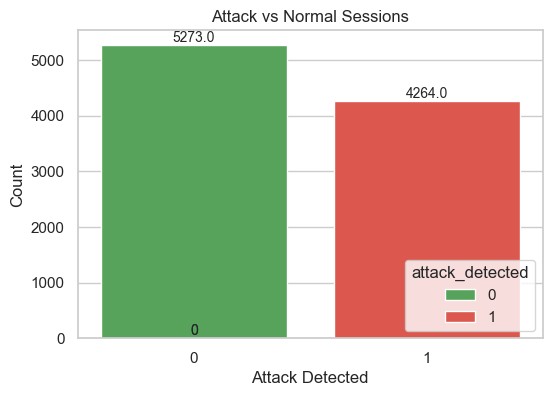

In [414]:
custom_colors = ['#4CAF50', '#F44336']  

plt.figure(figsize=(6, 4))
ax = sns.countplot(x='attack_detected',hue='attack_detected', data=ad, palette=custom_colors)

# Add labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2, height), 
                ha='center', va='bottom', fontsize=10)

plt.title('Attack vs Normal Sessions')
plt.xlabel('Attack Detected')
plt.ylabel('Count')
plt.show()


## Visualization

### All numerical features

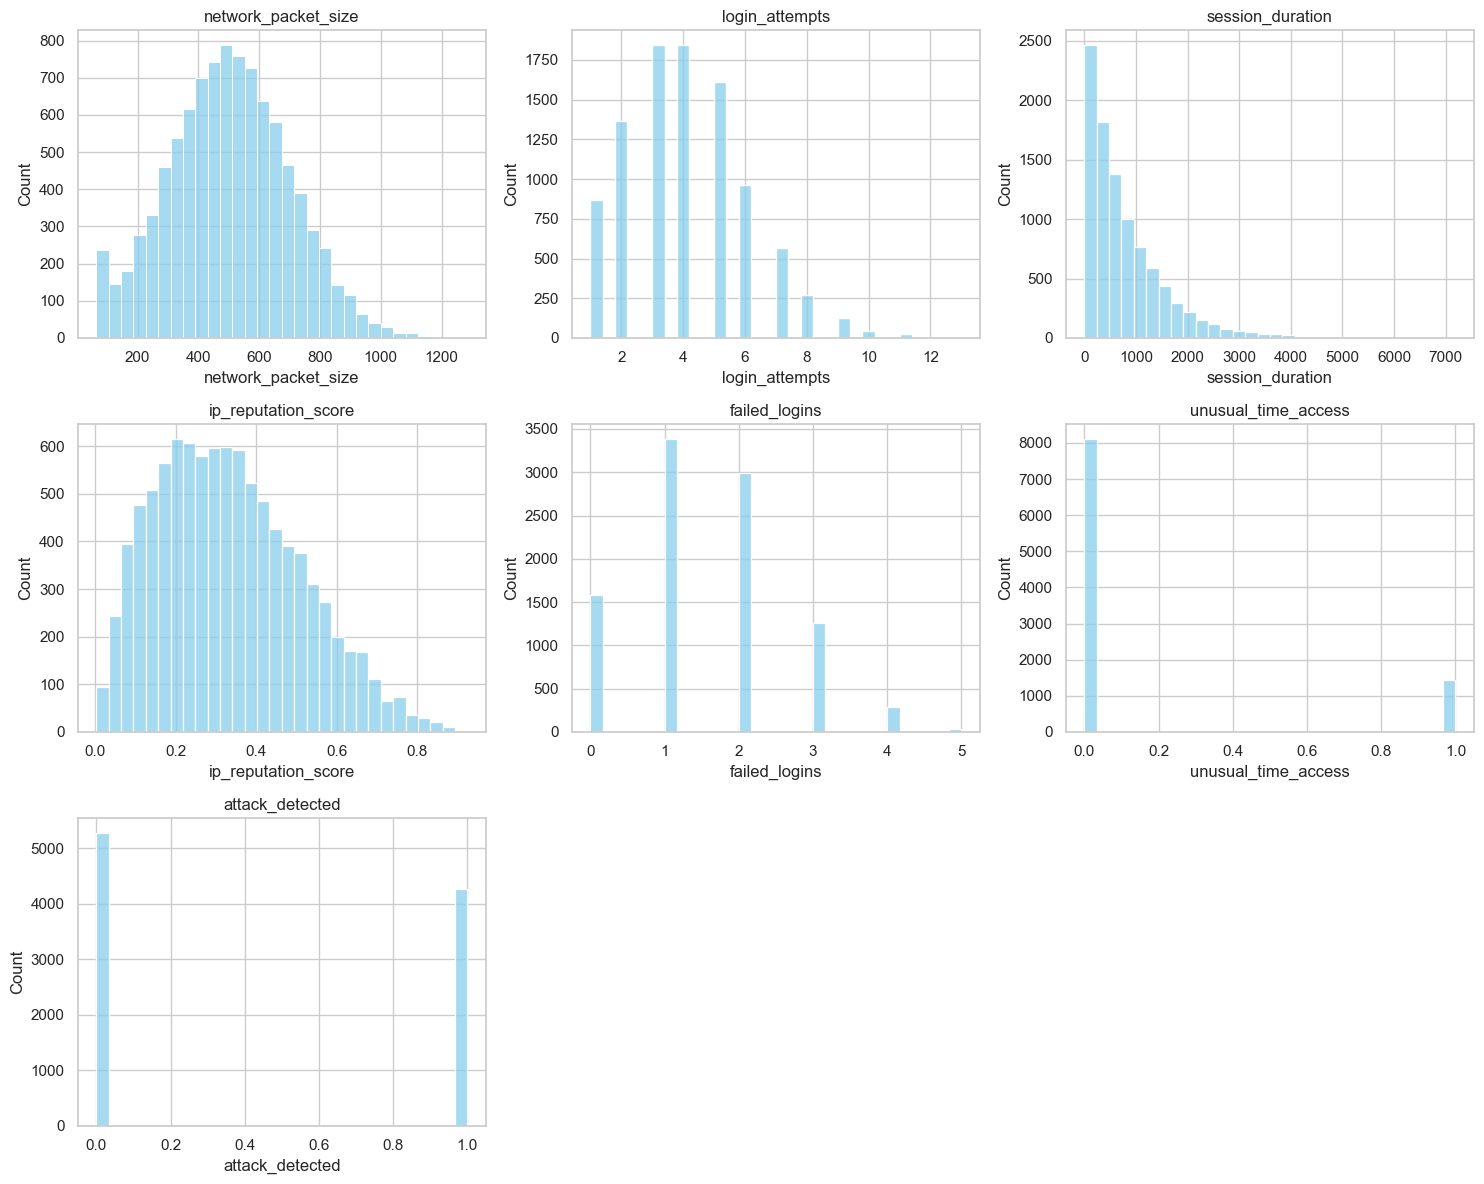

In [415]:
num_cols = ad.select_dtypes(include=['int64', 'float64']).columns
n_cols = 3  # 3 plots per row
n_rows = (len(num_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(15, n_rows * 4))
for idx, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, idx + 1)
    sns.histplot(ad[col], bins=30, kde=False, color='skyblue')
    plt.title(col)
    plt.tight_layout()
plt.show()


### Distribution of Session Duration

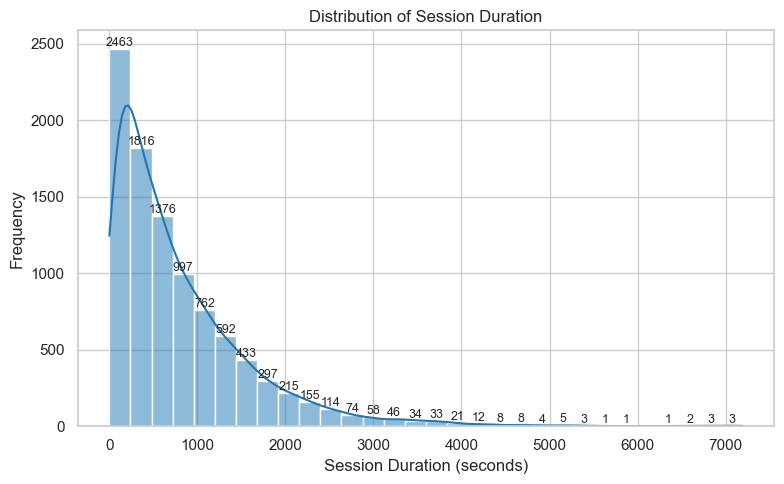

In [416]:
plt.figure(figsize=(8, 5))

# Plot the histogram and capture the bars
ax = sns.histplot(ad['session_duration'], kde=True, color='#1f77b4', bins=30)

# Add value labels on top of each bar
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:  # Avoid labeling empty bars
        ax.annotate(f'{height}', 
                    (p.get_x() + p.get_width() / 2, height), 
                    ha='center', va='bottom', fontsize=9)

plt.title('Distribution of Session Duration')
plt.xlabel('Session Duration (seconds)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


### Correlation Heatmap

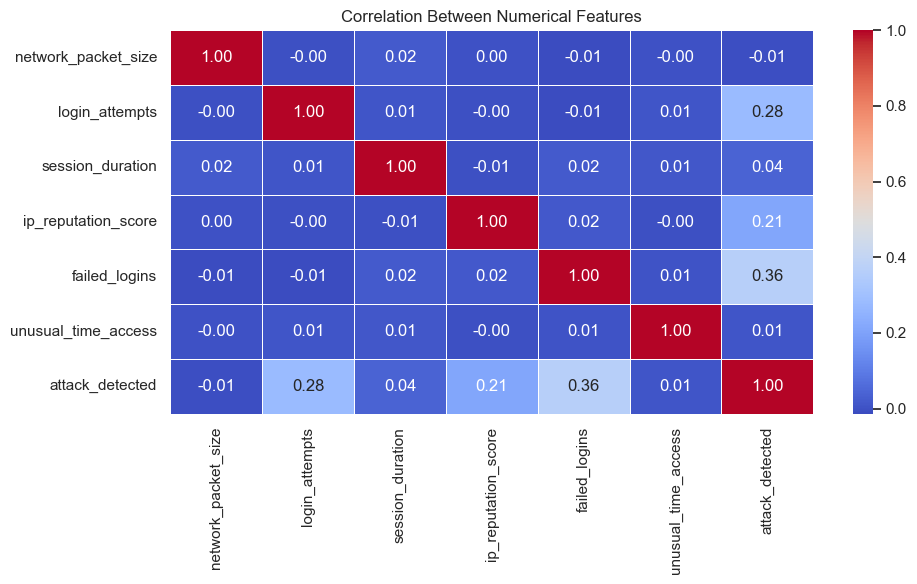

In [417]:
plt.figure(figsize=(10, 6))
corr_matrix = ad.corr(numeric_only=True)  # handles any categorical safely
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Numerical Features')
plt.tight_layout()
plt.show()


# Data Preprocessing

### Missing Values in Each Column

In [418]:
print(ad.isnull().sum())

session_id                0
network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
attack_detected           0
dtype: int64


### Fix missing values

In [419]:
ad['encryption_used'] = ad['encryption_used'].fillna('Unencrypted')
print(ad['encryption_used'].isnull().sum())

0


### Count each category

In [420]:
print(ad['encryption_used'].value_counts())

encryption_used
AES            4706
DES            2865
Unencrypted    1966
Name: count, dtype: int64


### Categorical Feature vs Target

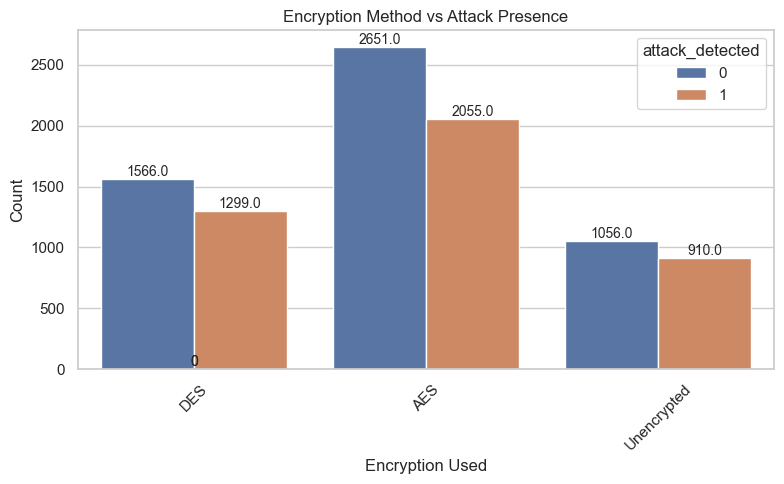

In [421]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='encryption_used', hue='attack_detected', data=ad)

# Add value labels on bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10)

plt.title('Encryption Method vs Attack Presence')
plt.xlabel('Encryption Used')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Drop column(unnecessary)

In [422]:
ad.drop('session_id', axis=1, inplace=True)

### Outlier Detection(IQR method)

In [423]:
numeric_cols = ['network_packet_size', 'login_attempts', 'session_duration',
                'ip_reputation_score', 'failed_logins']

# Detect and mark outliers
outlier_indices = set()

for col in numeric_cols:
    Q1 = ad[col].quantile(0.25)
    Q3 = ad[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ad[(ad[col] < lower) | (ad[col] > upper)].index
    outlier_indices.update(outliers)

print(f"Total rows with at least one outlier: {len(outlier_indices)}")

Total rows with at least one outlier: 963


###  Boxplot(before capping)

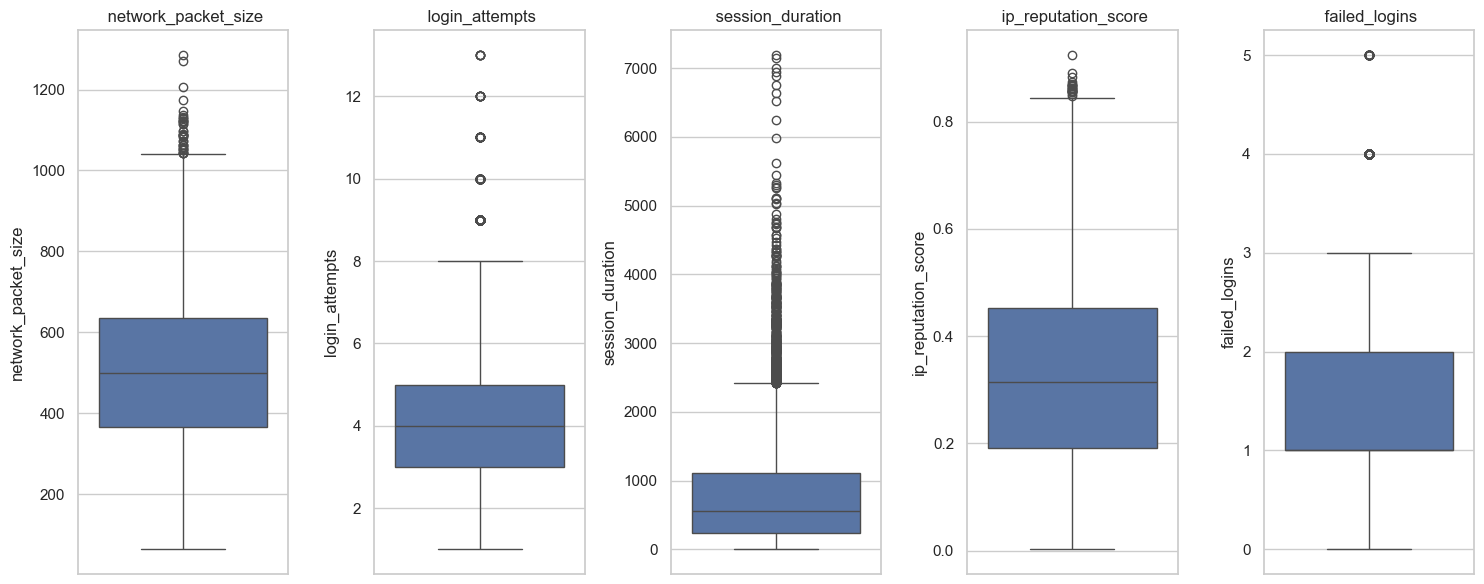

In [424]:
plt.figure(figsize=(15, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(y=ad[col])
    plt.title(f' {col}')
plt.tight_layout()
plt.show()

### Outlier treatment(Capping)

In [425]:
# Make a copy to preserve the original
ad_capped = ad.copy()

# Define numeric columns to cap
numeric_cols = ['network_packet_size', 'login_attempts', 'session_duration',
                'ip_reputation_score', 'failed_logins']

# Apply capping
for col in numeric_cols:
    Q1 = ad_capped[col].quantile(0.25)
    Q3 = ad_capped[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    ad_capped[col] = ad_capped[col].clip(lower, upper)

print("Outlier capping completed.")

Outlier capping completed.


###  Boxplot (After capping)

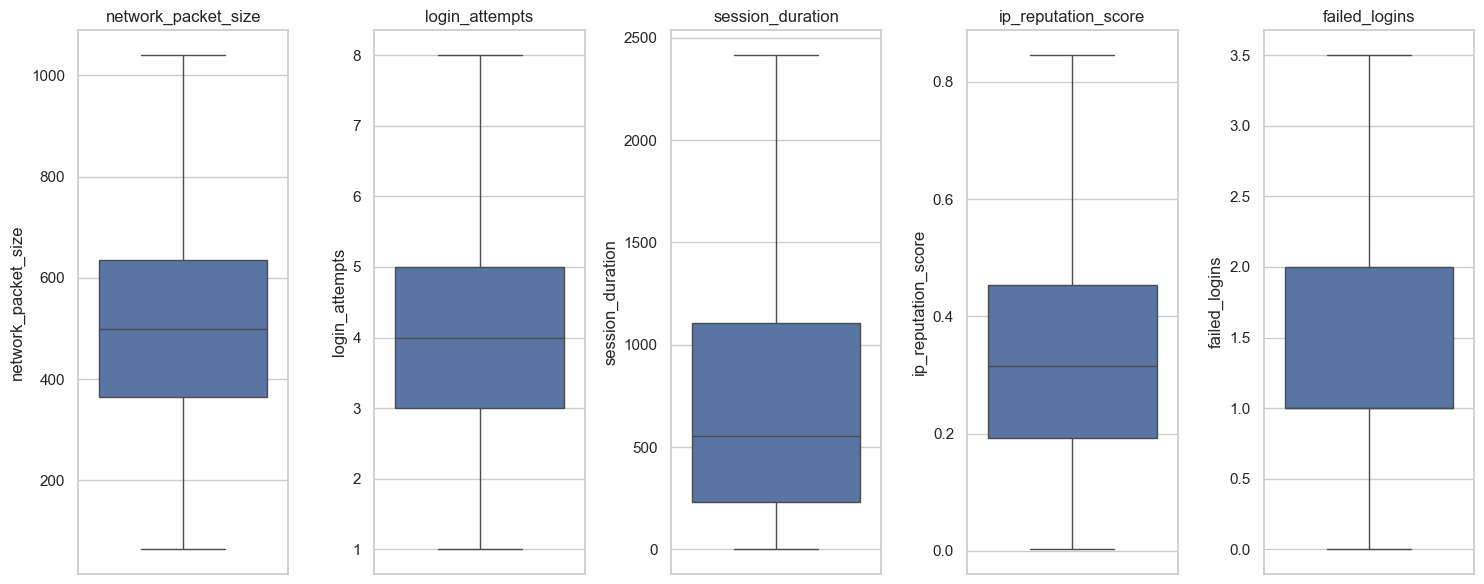

In [426]:
plt.figure(figsize=(15, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(y=ad_capped[col])
    plt.title(f'{col}')
plt.tight_layout()
plt.show()


### Imbalance problem
After preprocessing, we examined the distribution of the target variable attack_detected. The dataset contains 5273 instances of class 0 (no attack) and 4264 instances of class 1 (attack), resulting in an approximate 55:45 ratio.
This distribution does not indicate a significant class imbalance. Therefore, no oversampling or undersampling techniques were applied at this stage.

### Data Split

In [427]:
# Step 1: Separate features (X) and target (y)
X = ad.drop('attack_detected', axis=1)  # all columns except target
y = ad['attack_detected']               # target column

# Step 2: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% test, 80% train
    random_state=42,    # for reproducibility
    stratify=y          # keep class balance
)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

# Class distribution check
print("Train class balance:\n", y_train.value_counts(normalize=True))
print("Test class balance:\n", y_test.value_counts(normalize=True))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure consistent columns in train/test
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

Train shape: (7629, 9)
Test shape: (1908, 9)
Train class balance:
 attack_detected
0    0.55289
1    0.44711
Name: proportion, dtype: float64
Test class balance:
 attack_detected
0    0.552935
1    0.447065
Name: proportion, dtype: float64


###  Encoding

In [428]:
categorical_cols = ['protocol_type', 'encryption_used', 'browser_type']

# Apply target encoding to each categorical column
for col in categorical_cols:
    target_mean = X_train.join(y_train).groupby(col)['attack_detected'].mean()
    
    X_train[col + '_enc'] = X_train[col].map(target_mean)
    X_test[col + '_enc'] = X_test[col].map(target_mean)
    
    # Fill missing values in test set
    X_test[col + '_enc'] = X_test[col + '_enc'].fillna(target_mean.mean())


# Drop original categorical columns
X_train.drop(columns=categorical_cols, inplace=True)
X_test.drop(columns=categorical_cols, inplace=True)


In [429]:
# Example mapping display for documentation
mappings = {
    'encryption_used': {'encrypted': 1, 'unencrypted': 0},
    'protocol_type': {'TCP': 0, 'UDP': 1, 'ICMP': 2},
    'browser_type': {'Chrome': 0, 'Firefox': 1, 'Edge': 2, 'Safari': 3, 'Other': 4}
}

for feature, mapping in mappings.items():
    print(f"\n{feature} Encoding:")
    for k, v in mapping.items():
        print(f"{k:<15} --> {v}")


encryption_used Encoding:
encrypted       --> 1
unencrypted     --> 0

protocol_type Encoding:
TCP             --> 0
UDP             --> 1
ICMP            --> 2

browser_type Encoding:
Chrome          --> 0
Firefox         --> 1
Edge            --> 2
Safari          --> 3
Other           --> 4


### Feature Scaling

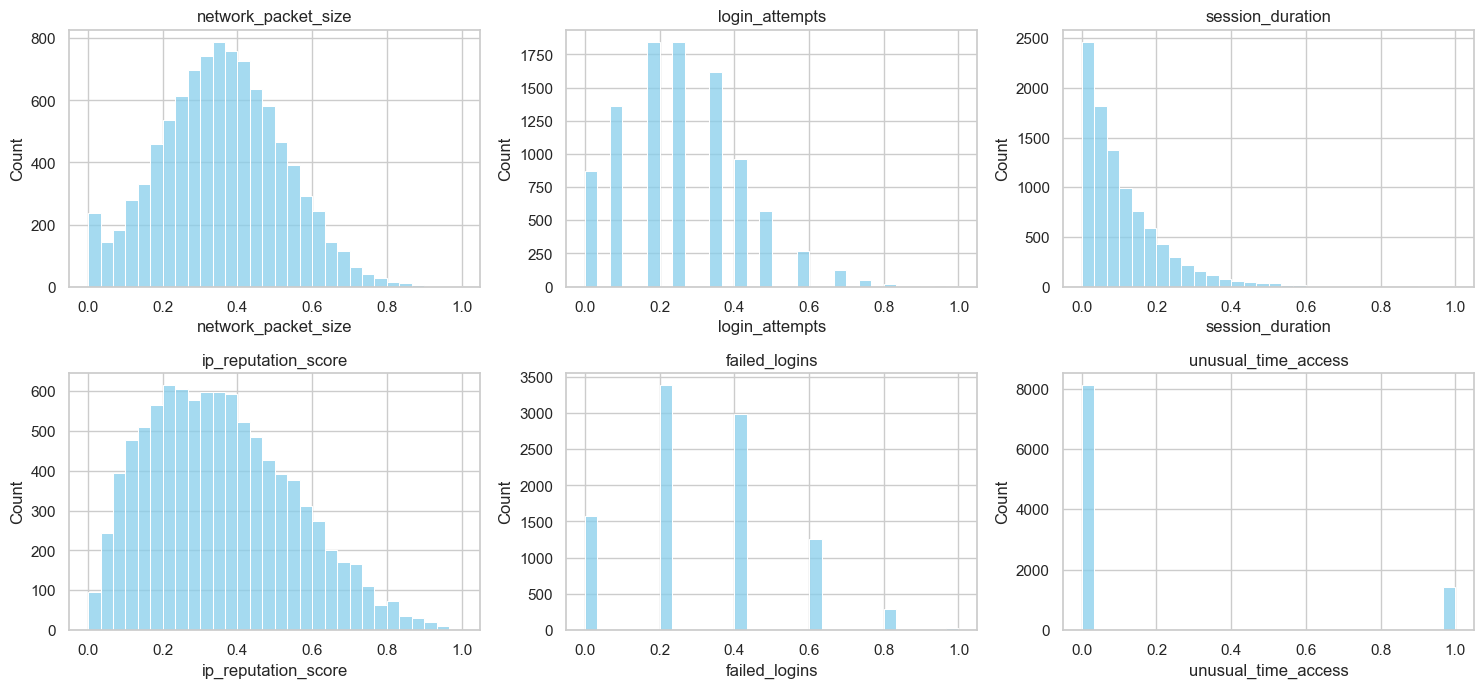

In [430]:

# Select columns to scale (exclude target if present)
features = ['network_packet_size', 'login_attempts', 'session_duration',
            'ip_reputation_score', 'failed_logins', 'unusual_time_access']

# Copy the DataFrame to avoid overwriting original data
data_to_scale = ad[features].copy()

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the features (except 'attack_detected' since it's binary target)
features_to_scale = ['network_packet_size', 'login_attempts', 'session_duration',
                     'ip_reputation_score', 'failed_logins', 'unusual_time_access']

data_to_scale[features_to_scale] = scaler.fit_transform(data_to_scale[features_to_scale])

# Plotting histograms in grid
plt.figure(figsize=(15, 10))

for i, col in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data_to_scale[col], bins=30, color='skyblue')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


# Model Training and Testing

### Logistic Regression

Logistic Regression (Before Feature Selection)
Accuracy       : 0.7479035639412998
Precision      : 0.7480516354233777
Recall         : 0.7479035639412998
F1 Score       : 0.7460840571014696
Selected Features: ['login_attempts', 'session_duration', 'ip_reputation_score', 'failed_logins', 'browser_type_enc']


C:\Users\admin\AppData\Local\Temp\ipykernel_22044\3136582792.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=selected_features, y=selected_scores, palette='viridis')


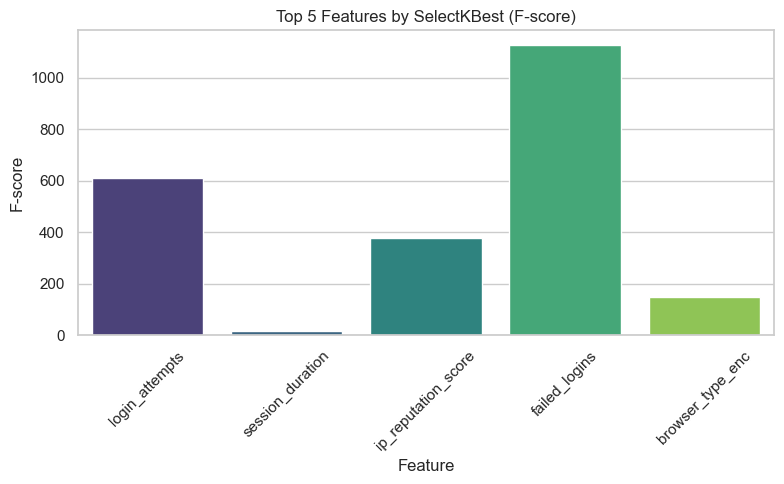


Logistic Regression (After SelectKBest - Top 5 Features)
Accuracy       : 0.7479035639412998
Precision      : 0.7478913025432219
Recall         : 0.7479035639412998
F1 Score       : 0.7462382148023641


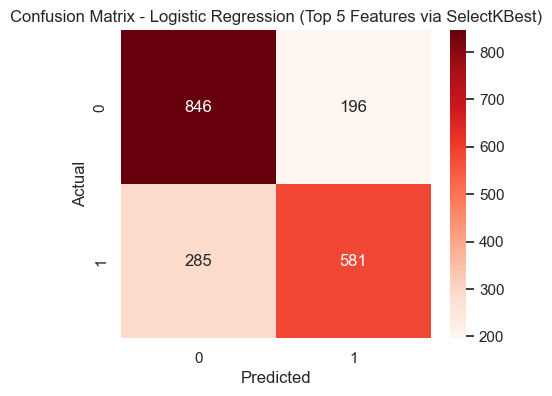


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.81      0.78      1042
           1       0.75      0.67      0.71       866

    accuracy                           0.75      1908
   macro avg       0.75      0.74      0.74      1908
weighted avg       0.75      0.75      0.75      1908



In [437]:
# 1. Train Logistic Regression on all features
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Predict
y_pred_all = lr_model.predict(X_test)

# Evaluate performance
print("Logistic Regression (Before Feature Selection)")
print("Accuracy       :", accuracy_score(y_test, y_pred_all))
print("Precision      :", precision_score(y_test, y_pred_all, average='weighted'))
print("Recall         :", recall_score(y_test, y_pred_all, average='weighted'))
print("F1 Score       :", f1_score(y_test, y_pred_all, average='weighted'))

# Feature selection
N = 5
selector = SelectKBest(score_func=f_classif, k=N)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get selected feature names
mask = selector.get_support()
selected_features = [feature for feature, keep in zip(feature_names, mask) if keep]
print(f"Selected Features: {selected_features}")
selected_scores = selector.scores_[mask]

plt.figure(figsize=(8,5))
sns.barplot(x=selected_features, y=selected_scores, palette='viridis')
plt.title(f'Top {N} Features by SelectKBest (F-score)')
plt.xlabel('Feature')
plt.ylabel('F-score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Train Logistic Regression on selected features
lr_model_selected = LogisticRegression(max_iter=1000, random_state=42)
lr_model_selected.fit(X_train_selected, y_train)

# Predict
y_pred_lr_selected = lr_model_selected.predict(X_test_selected)

# 3. Evaluate
print(f"\nLogistic Regression (After SelectKBest - Top {N} Features)")
print("Accuracy       :", accuracy_score(y_test, y_pred_lr_selected))
print("Precision      :", precision_score(y_test, y_pred_lr_selected, average='weighted'))
print("Recall         :", recall_score(y_test, y_pred_lr_selected, average='weighted'))
print("F1 Score       :", f1_score(y_test, y_pred_lr_selected, average='weighted'))

# Confusion Matrix
cm_selected = confusion_matrix(y_test, y_pred_lr_selected)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_selected, annot=True, fmt='d', cmap='Reds')
plt.title(f'Confusion Matrix - Logistic Regression (Top {N} Features via SelectKBest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr_selected))



### Random Forest

Random Forest (Before Feature Selection)
Accuracy       : 0.8936058700209644
Precision      : 0.9940387481371088
Recall         : 0.7702078521939953
F1 Score       : 0.8679245283018868
Selected Features: ['login_attempts', 'session_duration', 'ip_reputation_score', 'failed_logins', 'browser_type_enc']

Random Forest (After SelectKBest - Top 5 Features)
Accuracy       : 0.8852201257861635
Precision      : 0.8981021529950761
Recall         : 0.8852201257861635
F1 Score       : 0.8831089104534434


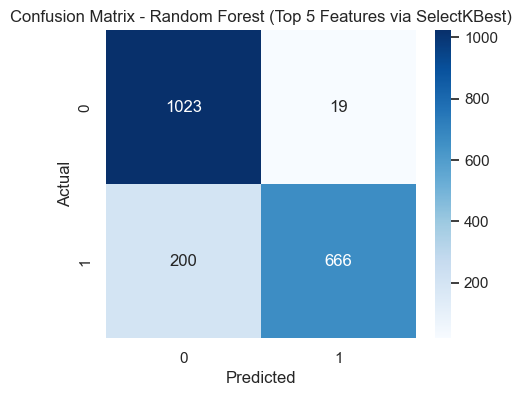


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1042
           1       0.97      0.77      0.86       866

    accuracy                           0.89      1908
   macro avg       0.90      0.88      0.88      1908
weighted avg       0.90      0.89      0.88      1908



In [432]:
# 1. Train Random Forest on all features
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf_all = rf_model.predict(X_test)

# Evaluate performance
print("Random Forest (Before Feature Selection)")
print("Accuracy       :", accuracy_score(y_test, y_pred_rf_all))
print("Precision      :", precision_score(y_test, y_pred_rf_all))
print("Recall         :", recall_score(y_test, y_pred_rf_all))
print("F1 Score       :", f1_score(y_test, y_pred_rf_all))



# 1. Apply SelectKBest to pick top N features
N = 5
selector = SelectKBest(score_func=f_classif, k=N)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get selected feature names
mask = selector.get_support()
selected_features = [feature for feature, keep in zip(feature_names, mask) if keep]
print(f"Selected Features: {selected_features}")

# 2. Train Random Forest on selected features
rf_model_selected = RandomForestClassifier(random_state=42)
rf_model_selected.fit(X_train_selected, y_train)

# Predict
y_pred_rf_selected = rf_model_selected.predict(X_test_selected)

# 3. Evaluate
print(f"\nRandom Forest (After SelectKBest - Top {N} Features)")
print("Accuracy       :", accuracy_score(y_test, y_pred_rf_selected))
print("Precision      :", precision_score(y_test, y_pred_rf_selected, average='weighted'))
print("Recall         :", recall_score(y_test, y_pred_rf_selected, average='weighted'))
print("F1 Score       :", f1_score(y_test, y_pred_rf_selected, average='weighted'))

# Confusion Matrix
cm_selected = confusion_matrix(y_test, y_pred_rf_selected)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_selected, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - Random Forest (Top {N} Features via SelectKBest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_selected))


### XGBoost

XGBoost (Before Feature Selection)
Accuracy       : 0.8873165618448637
Precision      : 0.9670014347202296
Recall         : 0.7782909930715936
F1 Score       : 0.8624440179142674
Selected Features: ['login_attempts', 'session_duration', 'ip_reputation_score', 'failed_logins', 'browser_type_enc']

XGBoost (After SelectKBest - Top 5 Features)
Accuracy       : 0.8825995807127882
Precision      : 0.8958180005502225
Recall         : 0.8825995807127882
F1 Score       : 0.880384569315712


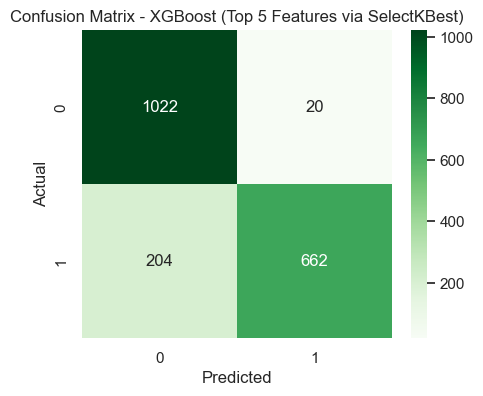


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1042
           1       0.97      0.76      0.86       866

    accuracy                           0.88      1908
   macro avg       0.90      0.87      0.88      1908
weighted avg       0.90      0.88      0.88      1908



In [433]:
# Train XGBoost on all features
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)

xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb_all = xgb_model.predict(X_test)

# Evaluate performance
print("XGBoost (Before Feature Selection)")
print("Accuracy       :", accuracy_score(y_test, y_pred_xgb_all))
print("Precision      :", precision_score(y_test, y_pred_xgb_all))
print("Recall         :", recall_score(y_test, y_pred_xgb_all))
print("F1 Score       :", f1_score(y_test, y_pred_xgb_all))

N = 5
selector = SelectKBest(score_func=f_classif, k=N)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get selected feature names
mask = selector.get_support()
selected_features = [feature for feature, keep in zip(feature_names, mask) if keep]
print(f"Selected Features: {selected_features}")

# 2. Train XGBoost on selected features
xgb_model_selected = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model_selected.fit(X_train_selected, y_train)

# Predict
y_pred_xgb_selected = xgb_model_selected.predict(X_test_selected)

# 3. Evaluate
print(f"\nXGBoost (After SelectKBest - Top {N} Features)")
print("Accuracy       :", accuracy_score(y_test, y_pred_xgb_selected))
print("Precision      :", precision_score(y_test, y_pred_xgb_selected, average='weighted'))
print("Recall         :", recall_score(y_test, y_pred_xgb_selected, average='weighted'))
print("F1 Score       :", f1_score(y_test, y_pred_xgb_selected, average='weighted'))

# Confusion Matrix
cm_selected = confusion_matrix(y_test, y_pred_xgb_selected)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_selected, annot=True, fmt='d', cmap='Greens')
plt.title(f'Confusion Matrix - XGBoost (Top {N} Features via SelectKBest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb_selected))

### Comparison

### Trained Model

                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression    0.7479     0.7497  0.6674    0.7062
1        Random Forest    0.8936     0.9940  0.7702    0.8679
2              XGBoost    0.8873     0.9670  0.7783    0.8624


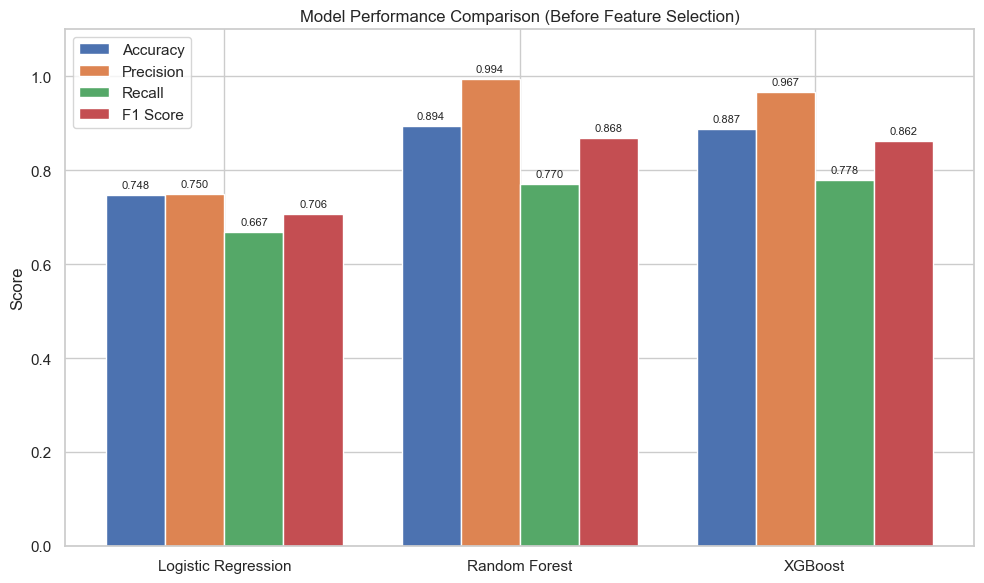

In [434]:
# Collect scores for each model
results = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [
        round(accuracy_score(y_test, y_pred_all), 4),
        round(accuracy_score(y_test, y_pred_rf_all), 4),
        round(accuracy_score(y_test, y_pred_xgb_all), 4)
    ],
    "Precision": [
        round(precision_score(y_test, y_pred_all), 4),
        round(precision_score(y_test, y_pred_rf_all), 4),
        round(precision_score(y_test, y_pred_xgb_all), 4)
    ],
    "Recall": [
        round(recall_score(y_test, y_pred_all), 4),
        round(recall_score(y_test, y_pred_rf_all), 4),
        round(recall_score(y_test, y_pred_xgb_all), 4)
    ],
    "F1 Score": [
        round(f1_score(y_test, y_pred_all), 4),
        round(f1_score(y_test, y_pred_rf_all), 4),
        round(f1_score(y_test, y_pred_xgb_all), 4)
    ]
}

# Create and display the results DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Set plot size
plt.figure(figsize=(10, 6))

# Bar width setup
bar_width = 0.2
models = results_df["Model"]
x = range(len(models))

# Plot each metric
bars1 = plt.bar([i - 1.5 * bar_width for i in x], results_df["Accuracy"], width=bar_width, label='Accuracy')
bars2 = plt.bar([i - 0.5 * bar_width for i in x], results_df["Precision"], width=bar_width, label='Precision')
bars3 = plt.bar([i + 0.5 * bar_width for i in x], results_df["Recall"], width=bar_width, label='Recall')
bars4 = plt.bar([i + 1.5 * bar_width for i in x], results_df["F1 Score"], width=bar_width, label='F1 Score')

# Add value labels on top of each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.015, f"{height:.3f}", ha='center', fontsize=8)

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
add_labels(bars4)

# Labels and layout
plt.xticks(x, models)
plt.ylabel("Score")
plt.title("Model Performance Comparison (Before Feature Selection)")
plt.ylim(0, 1.1)
plt.legend()
plt.tight_layout()
plt.show()


### Retrained Model

In [435]:
results = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [
        round(accuracy_score(y_test, y_pred_lr_selected), 4),
        round(accuracy_score(y_test, y_pred_rf_selected), 4),
        round(accuracy_score(y_test, y_pred_xgb_selected), 4)
    ],
    "Precision": [
        round(precision_score(y_test, y_pred_lr_selected, average='weighted'), 4),
        round(precision_score(y_test, y_pred_rf_selected, average='weighted'), 4),
        round(precision_score(y_test, y_pred_xgb_selected, average='weighted'), 4)
    ],
    "Recall": [
        round(recall_score(y_test, y_pred_lr_selected, average='weighted'), 4),
        round(recall_score(y_test, y_pred_rf_selected, average='weighted'), 4),
        round(recall_score(y_test, y_pred_xgb_selected, average='weighted'), 4)
    ],
    "F1 Score": [
        round(f1_score(y_test, y_pred_lr_selected, average='weighted'), 4),
        round(f1_score(y_test, y_pred_rf_selected, average='weighted'), 4),
        round(f1_score(y_test, y_pred_xgb_selected, average='weighted'), 4)
    ]
}
# Create and display the results DataFrame
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression    0.7479     0.7479  0.7479    0.7462
1        Random Forest    0.8852     0.8981  0.8852    0.8831
2              XGBoost    0.8826     0.8958  0.8826    0.8804


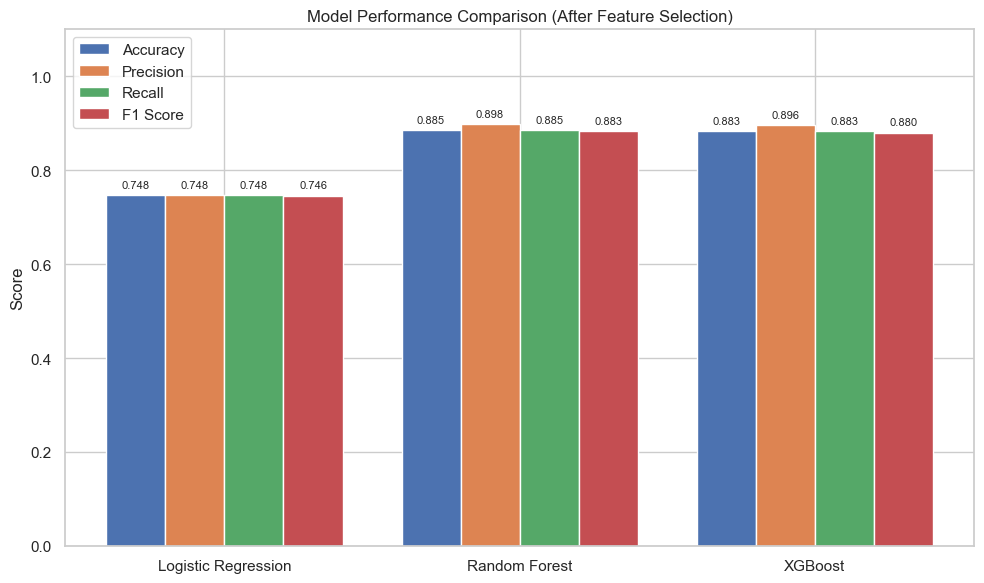

In [436]:

# Set plot size
plt.figure(figsize=(10, 6))

# Bar width setup
bar_width = 0.2
models = results_df["Model"]
x = range(len(models))

# Plot each metric
bars1 = plt.bar([i - 1.5 * bar_width for i in x], results_df["Accuracy"], width=bar_width, label='Accuracy')
bars2 = plt.bar([i - 0.5 * bar_width for i in x], results_df["Precision"], width=bar_width, label='Precision')
bars3 = plt.bar([i + 0.5 * bar_width for i in x], results_df["Recall"], width=bar_width, label='Recall')
bars4 = plt.bar([i + 1.5 * bar_width for i in x], results_df["F1 Score"], width=bar_width, label='F1 Score')

# Add value labels on top of each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.015, f"{height:.3f}", ha='center', fontsize=8)

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
add_labels(bars4)

# Labels and layout
plt.xticks(x, models)
plt.ylabel("Score")
plt.title("Model Performance Comparison (After Feature Selection)")
plt.ylim(0, 1.1)
plt.legend()
plt.tight_layout()
plt.show()
